In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#filter warnings

import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Read the daatset

df = pd.read_csv('concrete.csv')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Data Cleaning

In [4]:
# shape of the dataset

df.shape

(1030, 9)

In [5]:
# data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
# data description

df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
# checking the null/nan values in the data

df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [8]:
# name of the columns

df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [9]:
# Types of the data

df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [10]:
# Checking the duplicates

df.duplicated().sum()

25

In [11]:
#Removing the duplicates 

df.drop_duplicates(subset=None, inplace=True)
df.duplicated().sum()

0

### checking percentage of outliers in the dataset

In [12]:
q1= df.quantile(0.25)
q3= df.quantile(0.75)
IQR = q3-q1
outliers = pd.DataFrame(((df > (q3+1.5*IQR)) | (df < (q1-IQR*1.5))).sum(axis=0), columns=['No. of outliers'])
outliers['Percentage of outliers'] = round(outliers['No. of outliers']*100/len(df), 2)
outliers

,No. of outliers,Percentage of outliers
cement,0,0.00
slag,2,0.20
ash,0,0.00
water,15,1.49
superplastic,10,1.00
coarseagg,0,0.00
fineagg,5,0.50
age,59,5.87
strength,8,0.80


##### In the above table shows that, "age" column having 5.87% of outliers and we will go to work on age column

In [13]:
df.shape

(1005, 9)

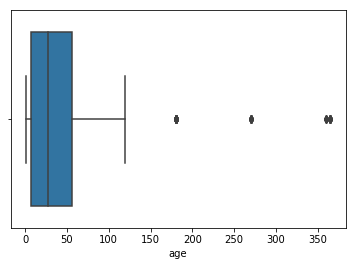

In [14]:
# using boxplot we will see outliers in the age column

sns.boxplot(df['age'])

#### Removing outliers using IQR Method 

In [15]:
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(Q1)
print(Q3)

49.0
7.0
56.0


In [16]:
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print(Lower_Fence)
print(Upper_Fence)

-66.5
129.5


In [17]:
# Below table is the outliers data

df[((df["age"] < Lower_Fence) |(df["age"] > Upper_Fence))]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
12,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270,43.01
17,342.0,38.0,0.0,228.0,0.0,932.0,670.0,365,56.14
19,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180,42.62
20,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
23,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,180,44.21
24,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365,52.52


In [18]:
# we are imputing the upperfence value in the place of outliers

df["age"] = np.where(df["age"] >129.5, Upper_Fence,df['age'])

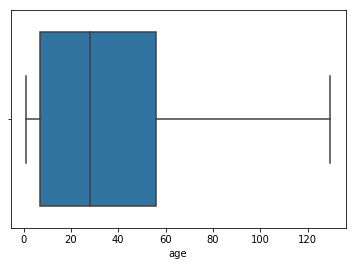

In [19]:
# checking the boxplot after outliers treatment

sns.boxplot(df['age'])

## EDA - Exploratory Data Analysis

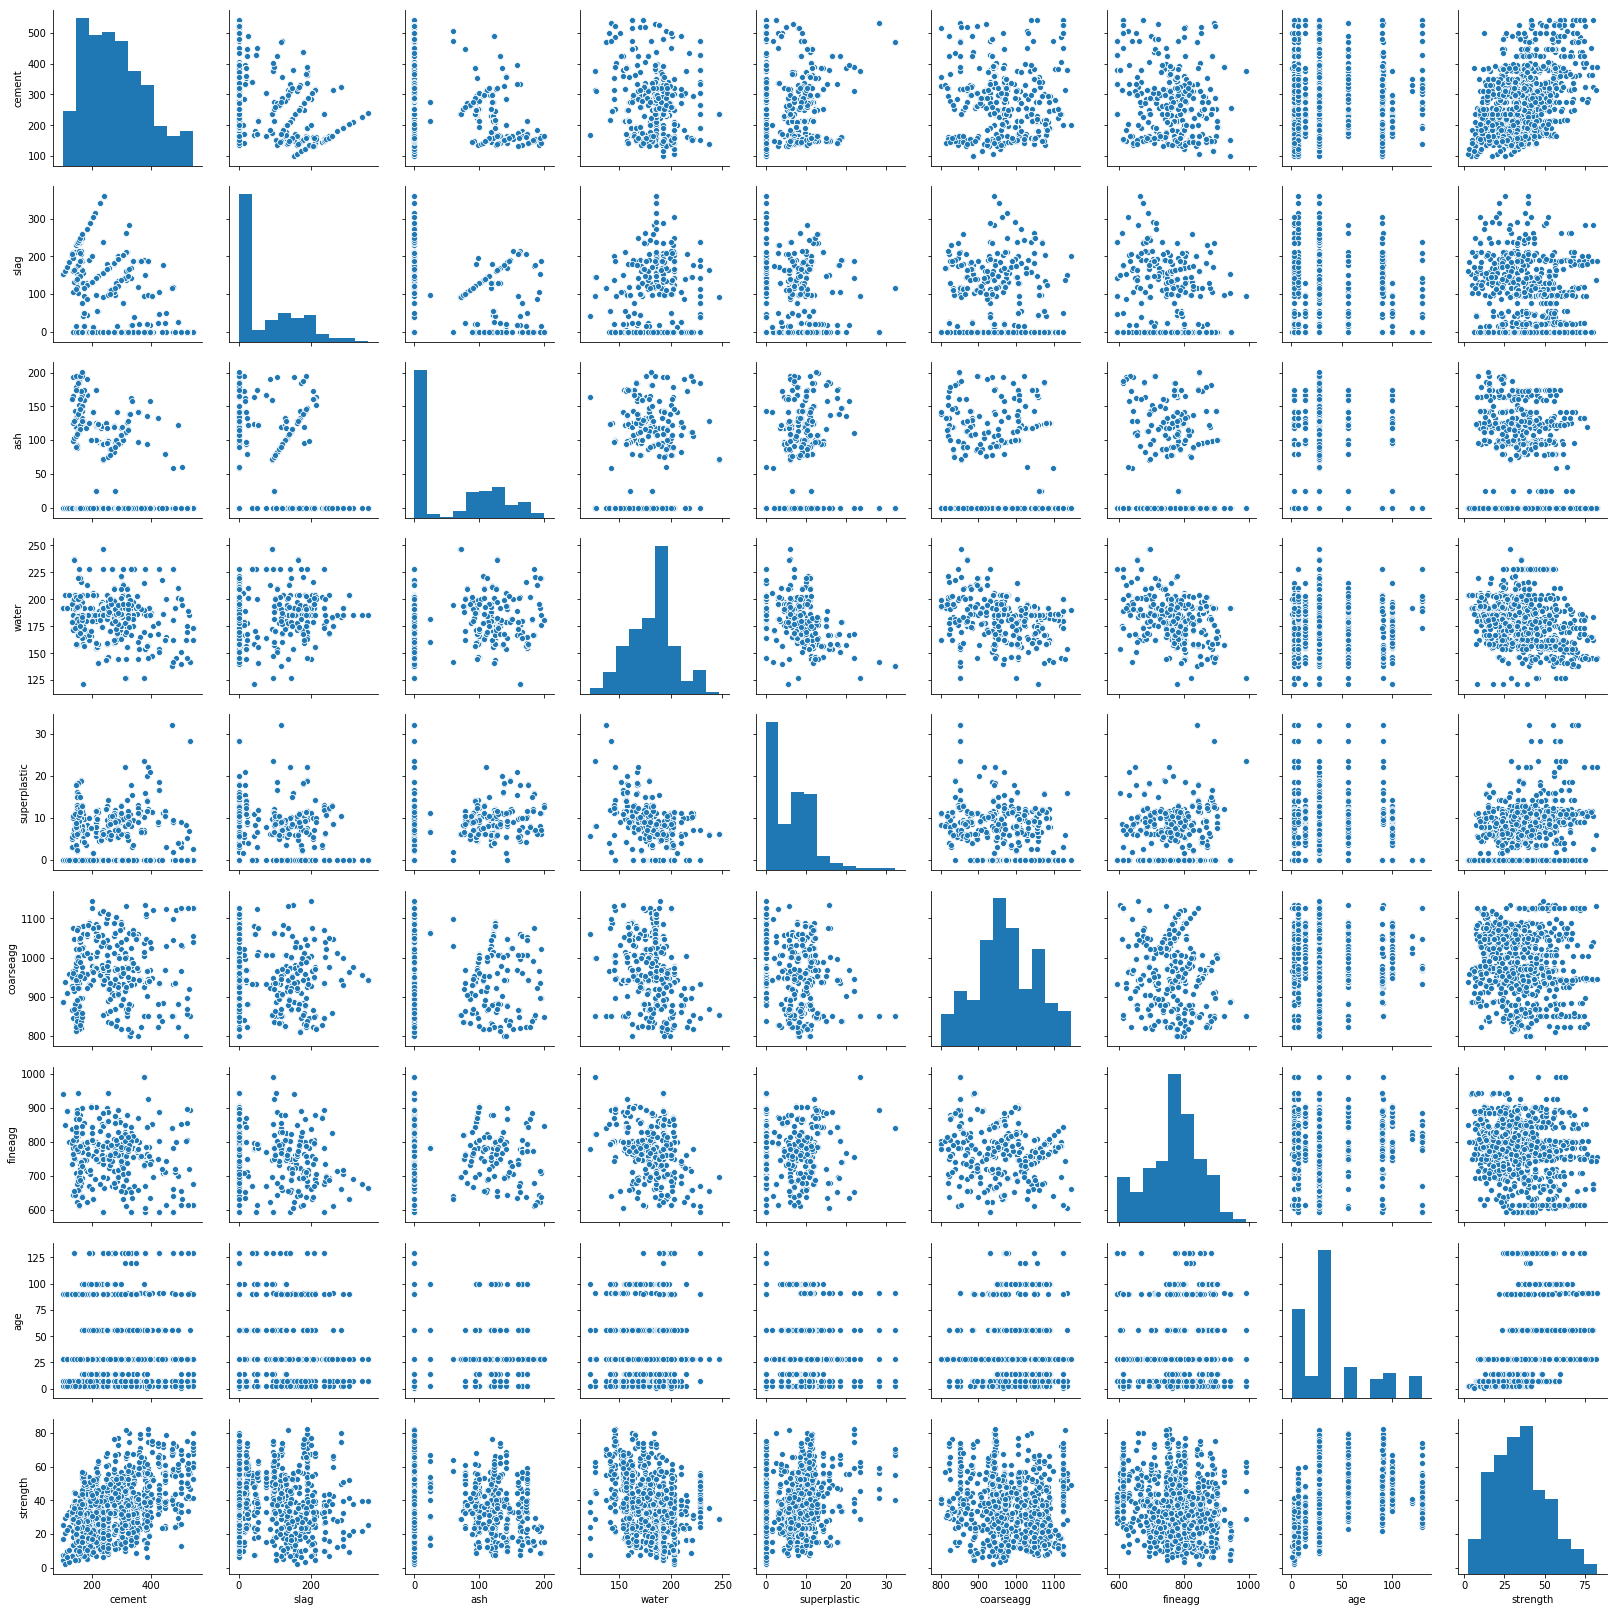

In [20]:
sns.pairplot(df)
plt.show()

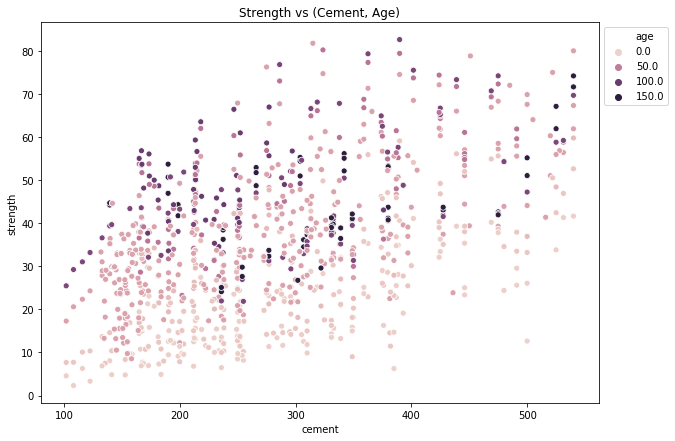

In [21]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="strength", x="cement", hue="age", data=df, ax=ax, sizes=(20, 200))
ax.set_title("Strength vs (Cement, Age)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

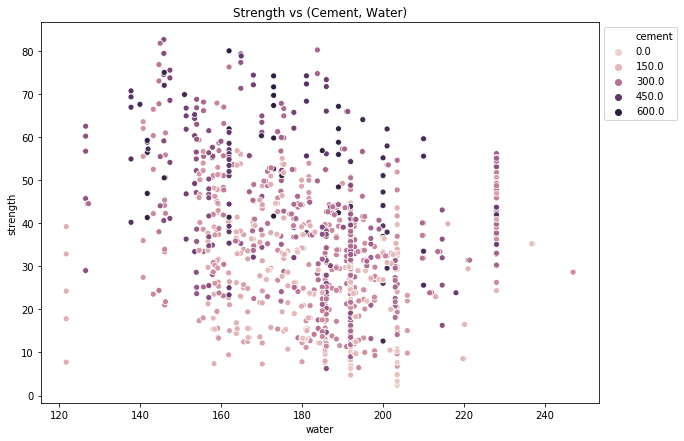

In [22]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="strength", x="water", hue="cement", data=df, ax=ax, sizes=(20, 200))
ax.set_title("Strength vs (Cement, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

#### From above plotting, we concluded that 

###### * When tha water is decreses strength of the concrete is increases
###### * The quantity of cement increases then the strength of the concrete increases
###### * The strength of the concrete increases with the age 

## Data PreProcessing

In [23]:
# split the data

X = df.iloc[:,:-1]         
y = df.iloc[:,-1]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [25]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

## Data Modelling

In [26]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression
lr = LinearRegression()

# Fitting models on Training data 
lr.fit(X_train, y_train)


# Making predictions on Test data
y_pred_lr = lr.predict(X_test)


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics

rm = np.sqrt(mean_squared_error(y_test, y_pred_lr))
ms = metrics.mean_squared_error(y_test, y_pred_lr)
ma = metrics.mean_absolute_error(y_test, y_pred_lr)
r2 = metrics.r2_score(y_test, y_pred_lr)

table = pd.DataFrame({
    'Metric': ['RMSE', 'MSE', 'MAE', 'R2_SCORE'],
    'Linear Regression': [rm, ms, ma, r2]})
table

,Metric,Linear Regression
0,RMSE,8.506108
1,MSE,72.353867
2,MAE,6.563576
3,R2_SCORE,0.707303


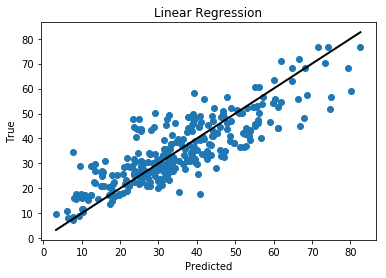

In [28]:
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Linear Regression")
plt.show()

In [29]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

rm = np.sqrt(mean_squared_error(y_test, y_pred_dtr))
ms = metrics.mean_squared_error(y_test, y_pred_dtr)
ma = metrics.mean_absolute_error(y_test, y_pred_dtr)
r2 = metrics.r2_score(y_test, y_pred_dtr)

table = pd.DataFrame({
    'Metric': ['RMSE', 'MSE', 'MAE', 'R2_SCORE'],
    'Decision Tree Regression': [rm, ms, ma, r2]})
table

,Metric,Decision Tree Regression
0,RMSE,7.354466
1,MSE,54.088177
2,MAE,5.081413
3,R2_SCORE,0.781194


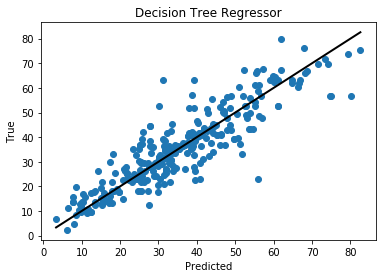

In [30]:
plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

In [31]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

rm = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
ms = metrics.mean_squared_error(y_test, y_pred_rfr)
ma = metrics.mean_absolute_error(y_test, y_pred_rfr)
r2 = metrics.r2_score(y_test, y_pred_rfr)

table = pd.DataFrame({
    'Metric': ['RMSE', 'MSE', 'MAE', 'R2_SCORE'],
    'Random Forest Regression': [rm, ms, ma, r2]})
table

,Metric,Random Forest Regression
0,RMSE,5.498030
1,MSE,30.228329
2,MAE,3.956334
3,R2_SCORE,0.877716


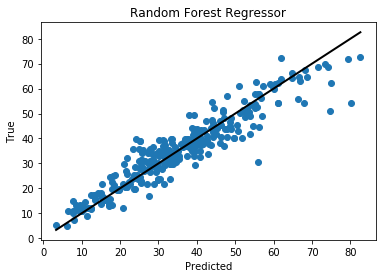

In [32]:
plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

In [33]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42, max_depth=4)
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)

rm = np.sqrt(mean_squared_error(y_test, y_pred_gb))
ms = metrics.mean_squared_error(y_test, y_pred_gb)
ma = metrics.mean_absolute_error(y_test, y_pred_gb)
r2 = metrics.r2_score(y_test, y_pred_gb)

table = pd.DataFrame({
    'Metric': ['RMSE', 'MSE', 'MAE', 'R2_SCORE'],
    'Gradient Boosting Regression': [rm, ms, ma, r2]})
table

,Metric,Gradient Boosting Regression
0,RMSE,4.665450
1,MSE,21.766421
2,MAE,3.423395
3,R2_SCORE,0.911947


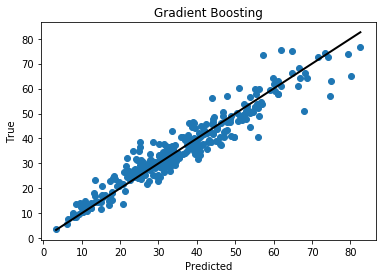

In [34]:
plt.scatter(y_test, y_pred_gb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Gradient Boosting")
plt.show()

In [35]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

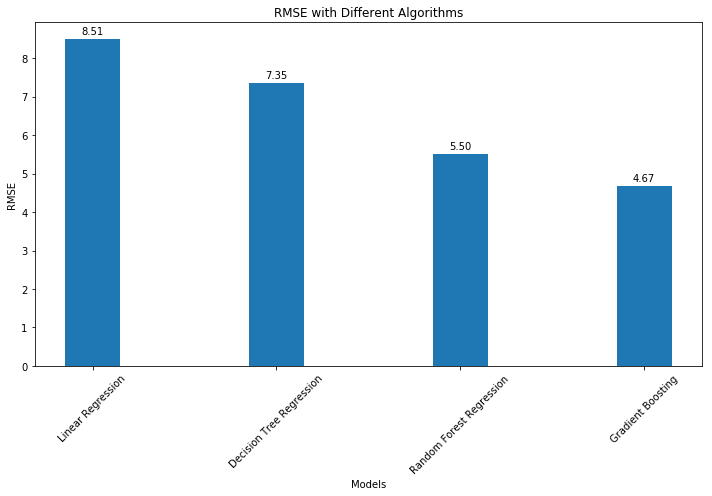

In [36]:
models = [lr, dtr, rfr,gb]
names = ["Linear Regression", "Decision Tree Regression", "Random Forest Regression","Gradient Boosting"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

x = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width)


ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.show()

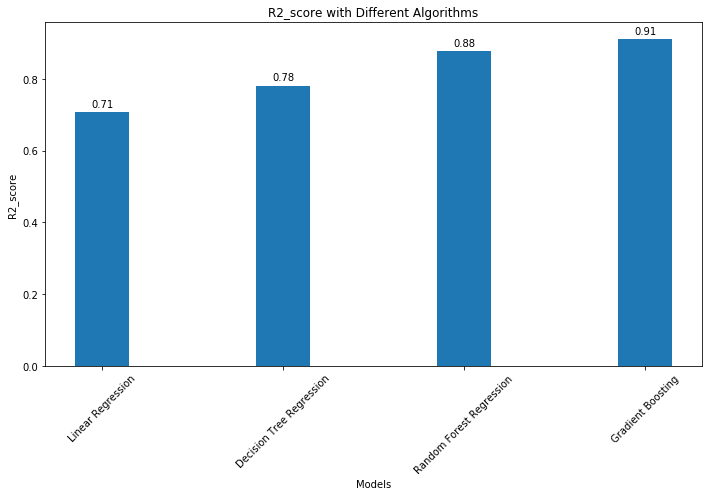

In [37]:
models = [lr, dtr, rfr,gb]
names = ["Linear Regression", "Decision Tree Regression", "Random Forest Regression","Gradient Boosting"]
rmses = []

for model in models:
    rmses.append(metrics.r2_score(y_test, model.predict(X_test)))

x = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('R2_score')
ax.set_xlabel('Models')
ax.set_title('R2_score with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.show()

# Note

## From the plotts we concluded that, among the four models Gradient Boosting has the 

##   higher r2_score value at the same time less RMSE score.

## Gradient Boosting is the best model for this project.